# Introduction

*Author: Hector R. Santos Marte*

The SAT is a multiple-choice exam with three sections: reading, writing and math, each of which is worth a maximum of 800 points. The purpose of the SAT is to measure high school student's readiness for college and provide colleges with one common data point that can be used to compare all applicants. A High average SAT scores is usually indicative of a good school.

There are currently debates about whether the SAT is a fair and non-discriminatory test. **My objective in this project is to analyze the relationship between different variables and the SAT results.**
 
New York City has a significant immigrant population and is very diverse, so comparing demographic factors such as: race, income, and gender with the SAT scores in NYC could provide me with some useful information. New York City has published high schools average SAT score data, along with additional complementary data sets, of which I will be using the following:

1. SAT scores by school - SAT scores for each high school in New York City
2. School attendance - Attendance information for each school in New York City
3. Class size - Information on class size for each school
4. AP test results - Advanced Placement (AP) exam results for each high school (passing an optional AP exam in a particular subject can earn a student college credit in that subject)
5. Graduation outcomes - The percentage of students who graduated, and other outcome information
6. Demographics - Demographic information for each school
7. School survey - Surveys of parents, teachers, and students at each school


In [1]:
import pandas as pd
import numpy
import re
import os
import pprint
import seaborn as sns
import warnings

os.chdir('C:\\Users\\hecto\\Desktop\\Python Working Directory\\SAT Data')
os.getcwd()

'C:\\Users\\hecto\\Desktop\\Python Working Directory\\SAT Data'

In [2]:
data_files = [
    "ap_2010.csv",
    "class_size.csv",
    "demographics.csv",
    "graduation.csv",
    "hs_directory.csv",
    "sat_results.csv"
]

data = {}

for f in data_files:
    d = pd.read_csv("C:\\Users\\hecto\\Desktop\\Python Working Directory\\SAT Data\\{0}".format(f))
    data[f.replace(".csv", "")] = d

In [3]:
for key in data:
    print(key)
    print('\n')
    pprint.pprint( data[key].columns)
    print('\n')

ap_2010


Index(['DBN', 'SchoolName', 'AP Test Takers ', 'Total Exams Taken',
       'Number of Exams with scores 3 4 or 5'],
      dtype='object')


class_size


Index(['CSD', 'BOROUGH', 'SCHOOL CODE', 'SCHOOL NAME', 'GRADE ',
       'PROGRAM TYPE', 'CORE SUBJECT (MS CORE and 9-12 ONLY)',
       'CORE COURSE (MS CORE and 9-12 ONLY)', 'SERVICE CATEGORY(K-9* ONLY)',
       'NUMBER OF STUDENTS / SEATS FILLED', 'NUMBER OF SECTIONS',
       'AVERAGE CLASS SIZE', 'SIZE OF SMALLEST CLASS', 'SIZE OF LARGEST CLASS',
       'DATA SOURCE', 'SCHOOLWIDE PUPIL-TEACHER RATIO'],
      dtype='object')


demographics


Index(['DBN', 'Name', 'schoolyear', 'fl_percent', 'frl_percent',
       'total_enrollment', 'prek', 'k', 'grade1', 'grade2', 'grade3', 'grade4',
       'grade5', 'grade6', 'grade7', 'grade8', 'grade9', 'grade10', 'grade11',
       'grade12', 'ell_num', 'ell_percent', 'sped_num', 'sped_percent',
       'ctt_num', 'selfcontained_num', 'asian_num', 'asian_per', 'black_num',
       'black_pe

## Obeservations:

- **DBN** :Every school in the system can be identified by its 6-digit code (DBN). The first two numbers represent the school district. The third character of the school code signifies the borough in which the school is located (M = Manhattan, X = Bronx, R = Staten Island, K = Brooklyn and Q = Queens). The final three digits are unique within borough

## *Class-size*:

- The data set doesn't have a DBN column -which is our key column for merging all the data. DBN is the sum of CSD and School Code, but the CSD has a 0 to the left of each number in the other data sets. This need to be corrected before creating the DBN column

- The grade column should only inclue high school students, which is “09-12"

- In the Program Type Column, I would only leave 'GEN ED' , because the other program types are focused on kids with special needs. Here's the explanation for each:

     **General Education (GE)** :General education classes are those classes not coded as special education, integrated co-teaching, gifted and talented, or accelerated. 

     **Gifted and Talented (G&T)** : G&T classes are identified as classes in grades K-5 where students have been placed through the DOE’s G&T screening process.

     **Integrated Co-Teaching (Formerly Collaborative Team Teaching or CTT)** : Integrated Co-Teaching (ICT) ensures that students with disabilities are educated alongside age-appropriate peers in a general education setting.

     **Self-contained Special Education(SPEC ED)**: Self-contained special education classrooms, are those with IEP defining specific student/teacher/paraprofessional ratios. The ratio of students to teachers and paraprofessionals (Setting) is denoted as 12:1, 12:1:1, etc.
     
    **Accelerated Courses** : Middle school accelerated courses are high school credit-bearing courses offered to middle school students.
    
- The data set has multiple rows for the same DBN, it should be condensed


## *Demographics*:

- The data set has multiple rows for the same DBN,it should be condensed
- The school years should be 2011 2012

## *Graduation*:

- The data set has multiple rows for the same DBN, it should be condensed 
- Reduce de data set to only total cohort in the Demographic column

# Read in the surveys

In [4]:
all_survey = pd.read_csv("survey_all.txt", delimiter="\t", encoding='windows-1252')
d75_survey = pd.read_csv("survey_d75.txt", delimiter="\t", encoding='windows-1252')
survey = pd.concat([all_survey, d75_survey], axis=0)

# Creating a DBN columns by copying the dbn column
survey["DBN"] = survey["dbn"]

There are many unnecessary columns, so I will erase them. Here is a list of the ones staying:
    
- dbn: School identification code (district borough number)
- rr_s: Student Response Rate
- rr_t: Teacher Response Rate
- rr_p: Parent Response Rate
- N_s: Number of student respondents
- N_t: Number of teacher respondents
- N_p: Number of parent respondents
- nr_s: Number of eligible students
- nr_t: Number of eligible teachers
- nr_p: Number of eligible parents
- saf_p_11: Safety and Respect score based on parent responses
- com_p_11: Communication score based on parent responses
- eng_p_11: Engagement score based on parent responses
- aca_p_11: Academic expectations score based on parent responses
- saf_t_11: Safety and Respect score based on teacher responses
- com_t_11: Communication score based on teacher responses
- eng_t_11: Engagement score based on teacher responses
- aca_t_11: Academic expectations score based on teacher responses
- saf_s_11: Safety and Respect score based on student responses
- com_s_11: Communication score based on student responses
- eng_s_11: Engagement score based on student responses
- aca_s_11: Academic expectations score based on student responses
- saf_tot_11: Safety and Respect total score
- com_tot_11: Communication total score
- eng_tot_11: Engagement total score
- aca_tot_11: Academic Expectations total score

In [5]:
survey_fields = [
    "DBN", 
    "rr_s", 
    "rr_t", 
    "rr_p", 
    "N_s", 
    "N_t", 
    "N_p", 
    "saf_p_11", 
    "com_p_11", 
    "eng_p_11", 
    "aca_p_11", 
    "saf_t_11", 
    "com_t_11", 
    "eng_t_11", 
    "aca_t_11", 
    "saf_s_11", 
    "com_s_11", 
    "eng_s_11", 
    "aca_s_11", 
    "saf_tot_11", 
    "com_tot_11", 
    "eng_tot_11", 
    "aca_tot_11",
]
survey = survey.loc[:,survey_fields]
data["survey"] = survey

# Add DBN columns

In [6]:
# Renaming the dbn column to DBN in the hs_directory
data["hs_directory"].rename(columns={'dbn':'DBN'},inplace=True)
data["hs_directory"].columns

Index(['DBN', 'school_name', 'borough', 'building_code', 'phone_number',
       'fax_number', 'grade_span_min', 'grade_span_max', 'expgrade_span_min',
       'expgrade_span_max', 'bus', 'subway', 'primary_address_line_1', 'city',
       'state_code', 'postcode', 'website', 'total_students', 'campus_name',
       'school_type', 'overview_paragraph', 'program_highlights',
       'language_classes', 'advancedplacement_courses', 'online_ap_courses',
       'online_language_courses', 'extracurricular_activities',
       'psal_sports_boys', 'psal_sports_girls', 'psal_sports_coed',
       'school_sports', 'partner_cbo', 'partner_hospital', 'partner_highered',
       'partner_cultural', 'partner_nonprofit', 'partner_corporate',
       'partner_financial', 'partner_other', 'addtl_info1', 'addtl_info2',
       'start_time', 'end_time', 'se_services', 'ell_programs',
       'school_accessibility_description', 'number_programs', 'priority01',
       'priority02', 'priority03', 'priority04', 'prior

In [7]:
# Creating a function for padding the CSD in the class_size data set
def pad_csd(num):
    string_representation = str(num)
    if len(string_representation) > 1:
        return string_representation
    else:
        return "0" + string_representation
    
# Creating a Padded  CSD column and creating the DBN column using the padded csd column in the class_size data set    
data["class_size"]["padded_csd"] = data["class_size"]["CSD"].apply(pad_csd)
data["class_size"]["DBN"] = data["class_size"]["padded_csd"] + data["class_size"]["SCHOOL CODE"]
data["class_size"]["DBN"].head(3)

0    01M015
1    01M015
2    01M015
Name: DBN, dtype: object

# Convert columns to numeric

In [8]:
#converting some columns in the sat_results data set to numeric
cols = ['SAT Math Avg. Score', 'SAT Critical Reading Avg. Score', 'SAT Writing Avg. Score']
for c in cols:
    data["sat_results"][c] = pd.to_numeric(data["sat_results"][c], errors="coerce")
    
#Creating an sat_score column in the sat_reults data set
data['sat_results']['sat_score'] = data['sat_result`s'][cols[0]] + data['sat_results'][cols[1]] + data['sat_results'][cols[2]]

In [9]:
#Extracting the latitud and longitude from the locaton_1 column in the hs_directory data set

pd.set_option('max_colwidth', 1000)
data["hs_directory"]["Location 1"].head(3)

0    8 21 Bay 25 Street\nFar Rockaway, NY 11691\n(40.601989336, -73.762834323)
1        2630 Benson Avenue\nBrooklyn, NY 11214\n(40.593593811, -73.984729232)
2     1014 Lafayette Avenue\nBrooklyn, NY 11221\n(40.692133704, -73.931503172)
Name: Location 1, dtype: object

**The latitude and longitude are inside the parentheses.**

In [10]:
#Creating two functions : one for the extracting the  latitude and  for the longitude. 

def find_lat(loc):
    coords = re.findall("\(.+, .+\)", loc)
    lat = coords[0].split(",")[0].replace("(", "")
    return lat

def find_lon(loc):
    coords = re.findall("\(.+, .+\)", loc)
    lon = coords[0].split(",")[1].replace(")", "").strip()
    return lon
#One column for each is created in the hs_directory data set 
data["hs_directory"]["lat"] = data["hs_directory"]["Location 1"].apply(find_lat)
data["hs_directory"]["lon"] = data["hs_directory"]["Location 1"].apply(find_lon)
     
data["hs_directory"]["lat"] = pd.to_numeric(data["hs_directory"]["lat"], errors="coerce")
data["hs_directory"]["lon"] = pd.to_numeric(data["hs_directory"]["lon"], errors="coerce")

data["hs_directory"][['Location 1','lat','lon']].head(3)

,Location 1,lat,lon
0,"8 21 Bay 25 Street\nFar Rockaway, NY 11691\n(40.601989336, -73.762834323)",40.601989,-73.762834
1,"2630 Benson Avenue\nBrooklyn, NY 11214\n(40.593593811, -73.984729232)",40.593594,-73.984729
2,"1014 Lafayette Avenue\nBrooklyn, NY 11221\n(40.692133704, -73.931503172)",40.692134,-73.931503


In [11]:
## Convert AP scores to numeric
cols = ['AP Test Takers ', 'Total Exams Taken', 'Number of Exams with scores 3 4 or 5']

for col in cols:
    data["ap_2010"][col] = pd.to_numeric(data["ap_2010"][col], errors="coerce")

# Condense datasets

In [12]:
#Filtering the data set class_size to only include data from high school students and general education programs
class_size = data["class_size"]
class_size = class_size[class_size["GRADE "] == "09-12"]
class_size = class_size[class_size["PROGRAM TYPE"] == "GEN ED"]
class_size.head(3)

,CSD,BOROUGH,SCHOOL CODE,SCHOOL NAME,GRADE,PROGRAM TYPE,CORE SUBJECT (MS CORE and 9-12 ONLY),CORE COURSE (MS CORE and 9-12 ONLY),SERVICE CATEGORY(K-9* ONLY),NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,DATA SOURCE,SCHOOLWIDE PUPIL-TEACHER RATIO,padded_csd,DBN
225,1,M,M292,Henry Street School for International Studies,09-12,GEN ED,ENGLISH,English 9,-,63.0,3.0,21.0,19.0,25.0,STARS,NaN,01,01M292
226,1,M,M292,Henry Street School for International Studies,09-12,GEN ED,ENGLISH,English 10,-,79.0,3.0,26.3,24.0,31.0,STARS,NaN,01,01M292
227,1,M,M292,Henry Street School for International Studies,09-12,GEN ED,ENGLISH,English 11,-,38.0,2.0,19.0,16.0,22.0,STARS,NaN,01,01M292


In [13]:
#Grouping the DBNs that are repeated in several rows into a single one, where the values of the other numeric columns will be average
class_size = class_size.groupby("DBN").agg(numpy.mean)
class_size.reset_index(inplace=True)
data["class_size"] = class_size
data["class_size"].head(3)

,DBN,CSD,NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,SCHOOLWIDE PUPIL-TEACHER RATIO
0,01M292,1,88.0,4.0,22.564286,18.5,26.571429,NaN
1,01M332,1,46.0,2.0,22.000000,21.0,23.500000,NaN
2,01M378,1,33.0,1.0,33.000000,33.0,33.000000,NaN


In [14]:
#Filtering the demographics data set to only include the 2011-2012 school year
data["demographics"] = data["demographics"][data["demographics"]["schoolyear"] == 20112012]

In [15]:
#Filtering the graduation data set to include the entire group, instead of some subgroup and, the last year, which in this case is 2006
data["graduation"] = data["graduation"][data["graduation"]["Cohort"] == "2006"]
data["graduation"] = data["graduation"][data["graduation"]["Demographic"] == "Total Cohort"]

# Combining the Data Sets

In [34]:
#Left merge with DBN as the key value
combined = data["sat_results"]
combined = combined.merge(data["ap_2010"], on="DBN", how="left")
combined = combined.merge(data["graduation"], on="DBN", how="left")

#Inner Merge with DBN as the key value and filling Nan values with the mean
to_merge = ["class_size", "demographics", "survey", "hs_directory"]

for m in to_merge:
    combined = combined.merge(data[m], on="DBN", how="inner")

combined = combined.fillna(combined.mean())
combined = combined.fillna(0)

pd.set_option('max_seq_items',300)
combined.columns

Index(['DBN', 'SCHOOL NAME', 'Num of SAT Test Takers',
       'SAT Critical Reading Avg. Score', 'SAT Math Avg. Score',
       'SAT Writing Avg. Score', 'sat_score', 'SchoolName', 'AP Test Takers ',
       'Total Exams Taken', 'Number of Exams with scores 3 4 or 5',
       'Demographic', 'School Name', 'Cohort', 'Total Cohort',
       'Total Grads - n', 'Total Grads - % of cohort', 'Total Regents - n',
       'Total Regents - % of cohort', 'Total Regents - % of grads',
       'Advanced Regents - n', 'Advanced Regents - % of cohort',
       'Advanced Regents - % of grads', 'Regents w/o Advanced - n',
       'Regents w/o Advanced - % of cohort',
       'Regents w/o Advanced - % of grads', 'Local - n', 'Local - % of cohort',
       'Local - % of grads', 'Still Enrolled - n',
       'Still Enrolled - % of cohort', 'Dropped Out - n',
       'Dropped Out - % of cohort', 'CSD', 'NUMBER OF STUDENTS / SEATS FILLED',
       'NUMBER OF SECTIONS', 'AVERAGE CLASS SIZE', 'SIZE OF SMALLEST CLASS',
  

In [17]:
combined.shape

(363, 164)

**The resulting data set has 165 columns in total. As I mentioned earlier, my objective is to determine the relationship between these variables and the SAT score. I  will calculte the correlation coefficient of each of these variables  and analyze in greater detail the most relevant ones.**

# Data Analysis: Finding Correlations

In [18]:
# Calculating the correlation between the SAT score and all the other variables

correlations = combined.corr()
sat_correlations = correlations["sat_score"]
correlations_df = pd.DataFrame(sat_correlations).reset_index()
correlations_df.rename(columns={'index':'variable','sat_score':'sat_score correlation'}, inplace=True)
pd.set_option('display.max_rows',None)
correlations_df = correlations_df.sort_values(by='sat_score correlation',ascending = False)
print(pd.DataFrame(correlations_df[correlations_df['sat_score correlation']>0.25]))
print('/n')
print(correlations_df[correlations_df['sat_score correlation']<-0.25])

                                variable  sat_score correlation
3                              sat_score               1.000000
2                 SAT Writing Avg. Score               0.987771
0        SAT Critical Reading Avg. Score               0.986820
1                    SAT Math Avg. Score               0.972643
11        Advanced Regents - % of cohort               0.771566
12         Advanced Regents - % of grads               0.739927
9            Total Regents - % of cohort               0.667603
41                             white_per               0.620718
8              Total Grads - % of cohort               0.584234
35                             asian_per               0.570730
4                        AP Test Takers                0.523140
5                      Total Exams Taken               0.514333
10            Total Regents - % of grads               0.494732
34                             asian_num               0.475445
6   Number of Exams with scores 3 4 or 5

# Observations:
- Some variables of the survey show a significant correlation, of which I can highlight the academic expectations and how safe the schools are perceived to be.

- The percentage of people who took the Regents and AP exams, and how well the perfomed on it, shows a high correlation with SAT scores.

- Race shows significant correlations, both positive and negative, depending  which race is taken into account.

- Regarding which sex predominates in the composition of the classrooms, that is, if there are more women or men, it does not seem to affect the SAT score very significantly.

# Survey and SAT Score

In [19]:
# Remove DBN since it's a unique identifier, not a useful numerical value for correlation.
survey_fields.remove("DBN")
import matplotlib.pyplot as plt
%matplotlib inline

* rr  = response rate 
* N = Number of  respondents
* nr = number of eligible 
* sf = Safety and Respect
* com = Communication score based 
* eng = Engagement score based 
* aca = Academic expectations 

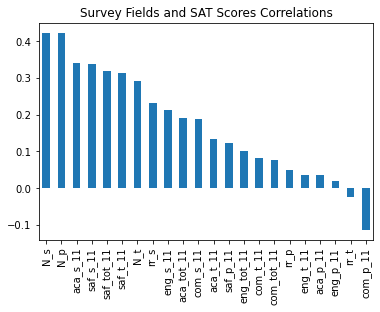

In [35]:
#Graphing the Correlations between the survey variables and the SAT scores.
sat_surveyFields_corr = sat_correlations[survey_fields].sort_values(ascending = False)
corr_plot = sat_surveyFields_corr.plot.bar(title="Survey Fields and SAT Scores Correlations",y="C. Coefficient")
plt.show()

The factors that have a positive correlation above 25 are:
* Number of parents, students and teacher respondents
* Academic Expectations based on students response 
* Safety and respect for teacher and students

In [21]:
warnings.filterwarnings('ignore')

## Safety and Respect for Students

AxesSubplot(0.125,0.125;0.775x0.755)


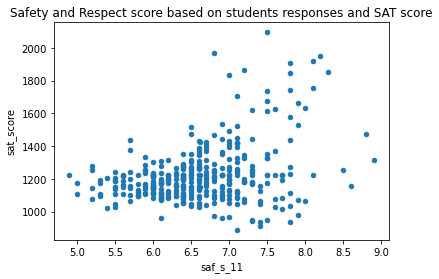

AxesSubplot(0.125,0.125;0.775x0.755)


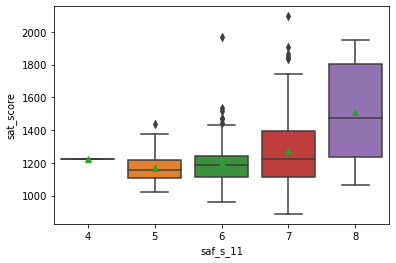

In [39]:
# Graphing the relationship between Safety and Respect and SAT scores
saf_s_11 = combined[['saf_s_11','sat_score']].astype('int')
print(combined.plot.scatter(x="saf_s_11",y="sat_score",title='Safety and Respect score based on students responses and SAT score'))
plt.show()
print(sns.boxplot(saf_s_11['saf_s_11'],saf_s_11['sat_score'],showmeans=True))
plt.show()

SAT scores and how safe and respectful are schools according to their students, have a positive correlation of 0.34. When looked at closely, the majority of schools have a saf score between 6 and 7 and an average SAT score around 1200.**However, it should be noted that schools with a saf of 8, which is a minority, registered an average score of 1500 points, a significant difference from lower scoring highschools**

In [23]:
boro = combined[['borough','saf_s_11','sat_score']]
saf_boro = boro.groupby("borough").agg(numpy.mean).sort_values('saf_s_11',ascending=False)
saf_boro = pd.DataFrame(saf_boro)
saf_boro = saf_boro.reset_index()
saf_boro

,borough,saf_s_11,sat_score
0,Manhattan,6.831370,1278.331410
1,Queens,6.721875,1286.753032
2,Bronx,6.606577,1157.598203
3,Staten Island,6.530000,1382.500000
4,Brooklyn,6.370755,1181.364461


Manhattan and Queens are the safest, bronx and state island in the middle and brooklyn at the bottom.

## Academic Expectations based on students response 

AxesSubplot(0.125,0.125;0.775x0.755)


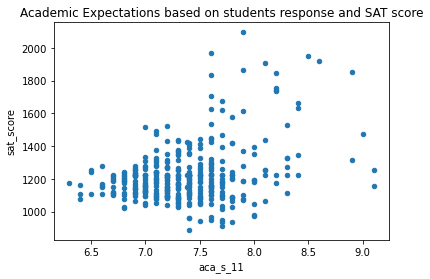

AxesSubplot(0.125,0.125;0.775x0.755)


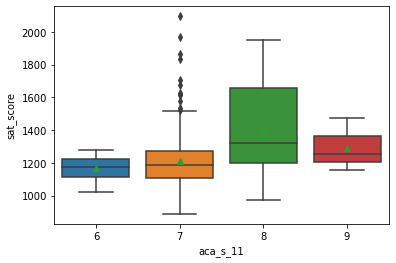

In [38]:
# Graphing the relationship between Students Academic Expectations and SAT scores
aca_s_11 = combined[['aca_s_11','sat_score']].astype('int')
print(combined.plot.scatter(x="aca_s_11",y="sat_score",title='Academic Expectations based on students response and SAT score'))
plt.show()
print(sns.boxplot(aca_s_11['aca_s_11'],saf_s_11['sat_score'],showmeans=True))
plt.show()

SAT scores and the students’ academic expectations have a positive correlation of 0.34. Most students gave their schools a 7 in terms academic expectations . This group of schools registered an average SAT score of 1200. On the other hand, the same group there shows a lot of outliers, with scores as high as 2000+ mark. Additionally, **schools with an 8 registered an average score around 1400 , the highest one,** even above schools with a 9 in academic expectations, which registered an average SAT close to 1300.

# Race and SAT score

Race and SAT Score Correlations
white_per       0.620718
asian_per       0.570730
black_per      -0.284139
hispanic_per   -0.396985
Name: sat_score, dtype: float64




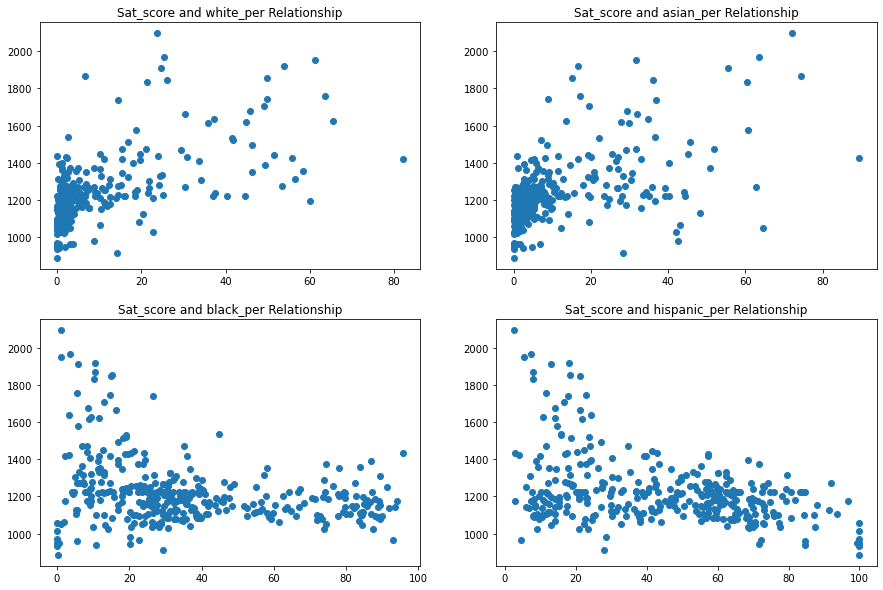

In [25]:
# Determining the relationship between race and SAT Score
race_columns = ['white_per','asian_per','black_per','hispanic_per']
print('Race and SAT Score Correlations')
print(correlations['sat_score'][race_columns])
print('\n')
fig = plt.figure(figsize=(15,10))

for sp,race in zip(range(0,4,1),race_columns):
    ax = fig.add_subplot(2,2,sp+1)
    ax.scatter(combined[race],combined['sat_score'])
    ax.set_title('Sat_score and '+str(race)+' Relationship')

With a correlation of 0.62, the first graph shows how a higher proportion of white students translates into a higher score. A very similar behavior can be seen with asians. On the other hand, quite the opposite happens with blacks and in a greater proportion with hispanics.

In [26]:
#Creating a Table with schools where more than 95% of their students are Hispanic and their SAT scores 
school_names = combined[['SCHOOL NAME','hispanic_per','sat_score']]
school_names[combined['hispanic_per']>95]

,SCHOOL NAME,hispanic_per,sat_score
44,MANHATTAN BRIDGES HIGH SCHOOL,99.8,1058.0
82,WASHINGTON HEIGHTS EXPEDITIONARY LEARNING SCHOOL,96.7,1174.0
89,GREGORIO LUPERON HIGH SCHOOL FOR SCIENCE AND MATHEMATICS,99.8,1014.0
125,ACADEMY FOR LANGUAGE AND TECHNOLOGY,99.4,951.0
141,INTERNATIONAL SCHOOL FOR LIBERAL ARTS,99.8,934.0
176,PAN AMERICAN INTERNATIONAL HIGH SCHOOL AT MONROE,99.8,970.0
253,MULTICULTURAL HIGH SCHOOL,99.8,887.0
286,PAN AMERICAN INTERNATIONAL HIGH SCHOOL,100.0,951.0


The schools listed above appear to primarily be geared towards recent immigrants to the US. These schools have a lot of students who are learning English, which could explain the lower SAT scores.

In [27]:
#Creating a Table with schools where less than 95% of their students are Hispanic and their SAT scores 
schools_less10_hispanic = school_names[combined['hispanic_per']<10]
schools_less10_hispanic[combined['sat_score']>1800]

,SCHOOL NAME,hispanic_per,sat_score
37,STUYVESANT HIGH SCHOOL,2.4,2096.0
151,BRONX HIGH SCHOOL OF SCIENCE,7.2,1969.0
187,BROOKLYN TECHNICAL HIGH SCHOOL,7.9,1833.0
327,QUEENS HIGH SCHOOL FOR THE SCIENCES AT YORK COLLEGE,7.9,1868.0
356,STATEN ISLAND TECHNICAL HIGH SCHOOL,5.3,1953.0


Many of the schools above appear to be specialized in science and technology . Aditionally, in order to be addmited an entrance exam is needed,so their  students  already have some experience with standardized tests. This might translate in higher  scores on the SAT.

# Gender and SAT Score

Gender and SAT Score Correlations
male_per     -0.112062
female_per    0.112108
Name: sat_score, dtype: float64




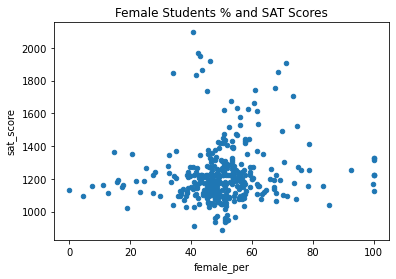

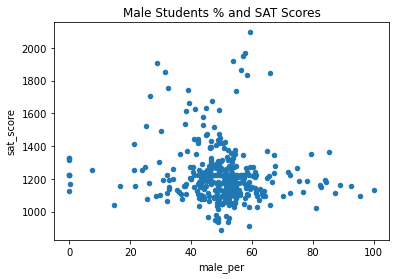

In [28]:
# Graphing the relationship between Gender and SAT scores
gender_columns = ['male_per','female_per']
gender_correlations = correlations['sat_score'][gender_columns]
print('Gender and SAT Score Correlations')
print(gender_correlations)
print('\n')

combined.plot.scatter(x='female_per',y='sat_score',title='Female Students % and SAT Scores')
plt.show()

combined.plot.scatter(x='male_per',y='sat_score',title='Male Students % and SAT Scores')
plt.show()

The majority of schools have an even distribution of male and female students, if one sex  predominates, the difference is around 10%.  These schools registered SAT scores between 1000 and 1400, but some of them registered SAT score outside this range, being 2100  the highest and 900 the lowest.
Schools where 60% or more of their students are male , registered scores around 1000 and 1900 ; while schools where  60% or more of their students are female, registed SAT scores around 1100 and 1900. Schools where more than 90% of their students were female didn't register a high SAT scores.

In [29]:
#Research any schools with a female_per greater than 60% and an average SAT score greater than 1700.
names = combined[['SCHOOL NAME','female_per','sat_score']]
names[names['female_per']>60][names['sat_score']>1700]

,SCHOOL NAME,female_per,sat_score
5,BARD HIGH SCHOOL EARLY COLLEGE,68.7,1856.0
26,ELEANOR ROOSEVELT HIGH SCHOOL,67.5,1758.0
60,BEACON HIGH SCHOOL,61.0,1744.0
61,FIORELLO H. LAGUARDIA HIGH SCHOOL OF MUSIC & ART AND PERFORMING ARTS,73.6,1707.0
302,TOWNSEND HARRIS HIGH SCHOOL,71.1,1910.0


These schools appears to be very selective liberal arts schools that have high academic standards.

# AP Exam Scores vs SAT Scores

Correlations of Percentage of AP test takers and Advance Regents with SAT score
ap_per                            0.057171
Advanced Regents - % of cohort    0.771566
Name: sat_score, dtype: float64




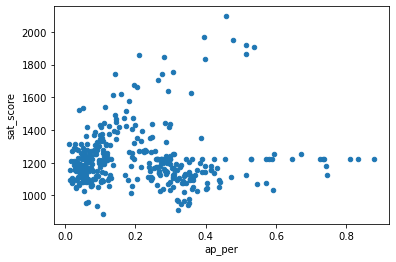

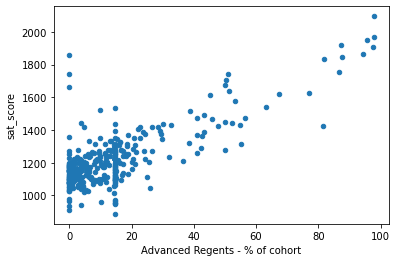

In [30]:
combined["ap_per"] = combined["AP Test Takers "] / combined["total_enrollment"]
test_columns = ['ap_per','Advanced Regents - % of cohort']
combined.plot.scatter(x='ap_per', y='sat_score')
combined.plot.scatter(x='Advanced Regents - % of cohort', y='sat_score')
SAT_AP = combined[['ap_per','Advanced Regents - % of cohort','sat_score']]
SAT_AP_corr = SAT_AP.corr()

SAT_AP_corr = SAT_AP_corr['sat_score'][test_columns]
SAT_AP_corr
print('Correlations of Percentage of AP test takers and Advance Regents with SAT score')
print(SAT_AP_corr)
print('\n')

The percentage of students who took advanced placement tests and the SAT have a very weak correlation . However, there is a strong correlation between the students who performed well on the AP test and the SAT score.

# Ranking schools based on their SAT score

*As a reminder:*
- More than 1400+ is an excellent score ,
- Between 1400 and 1300 a very good score,
- Between 1300 and 1200 a good score,
- Between 1200 and 1000 enough ,
- Less than 1000 is considered a bad score .

Enough       178
Good         100
Excellent     42
Very Good     31
Bad           12
Name: S_Clasification, dtype: int64


<AxesSubplot:ylabel='S_Clasification'>

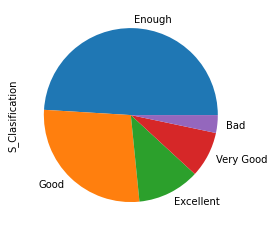

In [31]:
# creating a function categorize schools according to their sat score:

def SAT_categorizer(score):
    if score >= 1400:
        return 'Excellent'
    elif score < 1400 and score >= 1300:
        return 'Very Good'
    elif score < 1300 and score >= 1200:
        return 'Good'
    elif score < 1200 and score >= 1000:
        return 'Enough'
    else:
        return 'Bad'

combined['S_Clasification'] = combined['sat_score'].apply(SAT_categorizer)
print(combined['S_Clasification'].value_counts())
combined['S_Clasification'].value_counts().plot.pie()

AxesSubplot(0.125,0.125;0.775x0.755)


,male_per,female_per,saf_s_11,aca_s_11,white_per,asian_per,black_per,hispanic_per,ap_per,Advanced Regents - % of cohort,sat_score
S_Clasification,,,,,,,,,,,
Excellent,44.614286,55.385714,7.309802,7.797176,31.490476,31.004762,15.797619,20.585714,0.233600,48.981866,1610.238095
Very Good,47.003226,52.996774,6.819355,7.529032,14.461290,14.925806,31.567742,38.306452,0.134591,21.363146,1343.516129
Good,48.470000,51.530000,6.542117,7.319814,7.955000,10.561000,33.398000,47.255000,0.232184,13.432712,1236.572866
Enough,51.374719,48.623596,6.409616,7.274053,2.590449,4.356180,45.464607,46.888202,0.203416,6.216738,1122.533708
Bad,50.150000,49.850000,7.208333,7.650000,2.716667,7.325000,16.850000,72.758333,0.250222,8.426256,946.750000


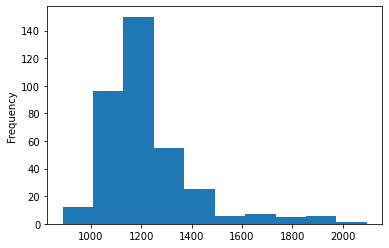

In [32]:
survey_columns = ['saf_s_11','aca_s_11']
exam_columns = ['ap_per','Advanced Regents - % of cohort']
columns_of_interest = gender_columns + survey_columns + race_columns + exam_columns + ['sat_score']
print(combined['sat_score'].plot.hist())
combined.groupby('S_Clasification').agg(numpy.mean)[columns_of_interest].sort_values('sat_score',ascending= False)

Regarding the analysis of variables of interest for the classifications of highschools according to their SAT score:

- highschools have an equal number of students according to their sex;
- the average score for the perception of safety and respect according to the students is around 7 points;
- academic expectations for all high schools is 7;
- high schools with excellent scores do have predominantly white and asian students;
- high scoring highschools have mostly black and Hispanic students;
- on average 70% of the students of highschools that perfomed badly are hispanic;
- the SAT score data is skewed to the right

# Conclusion

Seeking to answer the question of whether the SAT is a discriminatory test, I  just carried out an analysis of  the relationship between different variables and  the SAT score. Variables that showed a significant correlation were the perception of how safe and  respectful the high school is, students academic expectations, race, gender, and the AP examn. I used data from New York City high schools because of its demographic diversity.

The differences in outcome for the sexes is minimum and high schools were evenly distributed. On the other hand, this is not the case for races, Asians and White seem to perform a lot better than Blacks and Hispanics, but when taking a closer look to the data, I noticed the data is skewed to the right because a lot of high schools with a higher percentage of Asians or white students had an excellent score. Additionally,is important to highlight these high schools have more rigorous acceptance processes. Nevertheless, is also worth noticing that high schools that performed very good, 70% of their students are black or Hispanic. In my opinion, there is not a causal relationship between race and SAT score, the differences in SAT scores between different races is not due to the race, but rather because of cultural differences and barriers such as learning a new language. 

Additionally, how safe and respectful is a high school environment seem to have a positive impact on sat scores, but there are diminishing returns, schools should only be safe “enough.” When it comes to academic expectations the highest scoring group also have the highest SAT score.On the other hand, variables that initially seem to be important, such as the number of AP exam taken, showed no significant correlation when presented in relative terms with respect to the total number of students, while schools with higher percentage of students that registered high score on the AP exam also performed well on the SAT.

Author: Hector R. Santos Marte